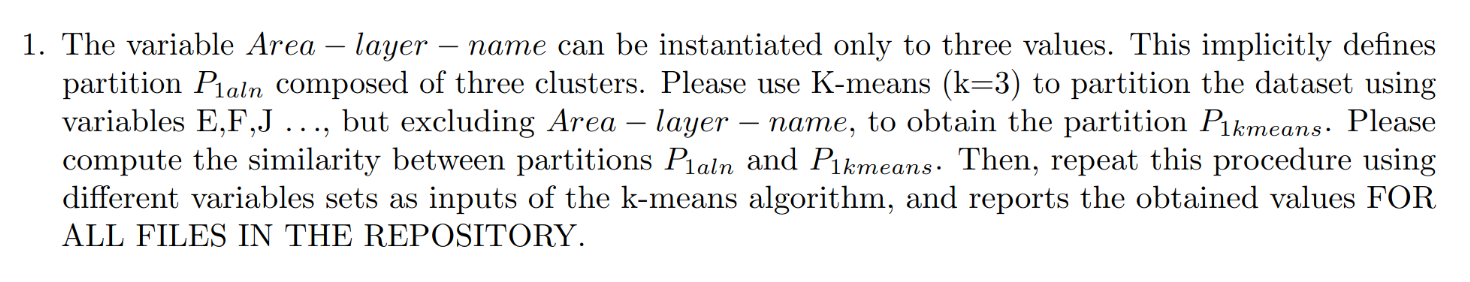

In [126]:
#import libraries
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, jaccard_score
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import seaborn as sns
from sklearn.metrics import adjusted_rand_score

In [99]:
df = pd.read_csv("../aldof/Documents/Sheet2/data/vfa-regione_toscana.turismo-presence_202205.csv")

df["customer_class_id"].unique()

# area_layer_id                     float64
# area_layer_name_it                 object
# area_id                           float64
# area_name_it                       object
# period_layer_id                   float64
# period_layer_name_it               object
# period_id                         float64
# period_start                       object
# period_end                         object
# customer_class_id                 float64
# customer_class_name_it             object
# visitor_class_id                  float64
# visitor_class_name_it              object
# detailed_visitor_class_id         float64
# detailed_visitor_class_name_it     object
# recurrency_class_id               float64
# recurrency_class_name_it           object
# seasonality_class_id              float64
# seasonality_class_name_it          object
# naval_tourist_id                  float64
# naval_tourist_name_it              object
# unique_users                        int64

## 11 objects, 10 float, 1 int

array([ 1.,  2., -1.])

In [100]:
## Since there are values with -1 we will add +1 so we dont have negative values

df["recurrency_class_id"] = df["recurrency_class_id"] +1
df["visitor_class_id"] = df["visitor_class_id"] +1
df["detailed_visitor_class_id"] = df["detailed_visitor_class_id"] +1
df["seasonality_class_id"] = df["seasonality_class_id"] +1
df["naval_tourist_id"] = df["naval_tourist_id"] +1
df["customer_class_id"] = df["customer_class_id"] +1

df


,area_layer_id,area_layer_name_it,area_id,area_name_it,period_layer_id,period_layer_name_it,period_id,period_start,period_end,customer_class_id,...,visitor_class_name_it,detailed_visitor_class_id,detailed_visitor_class_name_it,recurrency_class_id,recurrency_class_name_it,seasonality_class_id,seasonality_class_name_it,naval_tourist_id,naval_tourist_name_it,unique_users
0,1.0,Comune,45002.0,Bagnone,1.0,Giornaliera,20220505.0,2022-05-05,2022-05-05,2.0,...,Turista,4.0,Pendolare,2.0,[0] Nessuna Ricorrenza,1.0,Non Definito,1.0,Non definito,17
1,1.0,Comune,45002.0,Bagnone,1.0,Giornaliera,20220505.0,2022-05-05,2022-05-05,2.0,...,Turista,2.0,Occasionale,2.0,[0] Nessuna Ricorrenza,1.0,Non Definito,1.0,Non definito,22
2,1.0,Comune,45002.0,Bagnone,1.0,Giornaliera,20220505.0,2022-05-05,2022-05-05,3.0,...,Mascherato,0.0,Mascherato,0.0,Mascherato,0.0,Mascherato,0.0,Mascherato,22
3,1.0,Comune,45002.0,Bagnone,1.0,Giornaliera,20220505.0,2022-05-05,2022-05-05,3.0,...,Turista,4.0,Pendolare,2.0,[0] Nessuna Ricorrenza,1.0,Non Definito,1.0,Non definito,38
4,1.0,Comune,45002.0,Bagnone,1.0,Giornaliera,20220505.0,2022-05-05,2022-05-05,2.0,...,Visitatore in Giornata,0.0,Mascherato,0.0,Mascherato,0.0,Mascherato,0.0,Mascherato,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116457,1.0,Comune,53014.0,Manciano,1.0,Giornaliera,20220502.0,2022-05-02,2022-05-02,2.0,...,Abitante Abituale,1.0,Non definito,1.0,Non Definito,1.0,Non Definito,1.0,Non definito,5353
116458,1.0,Comune,53014.0,Manciano,2.0,Settimanale,20220519.0,2022-05-09,2022-05-15,3.0,...,Visitatore in Giornata,0.0,Mascherato,0.0,Mascherato,0.0,Mascherato,0.0,Mascherato,71
116459,1.0,Comune,53022.0,Santa Fiora,1.0,Giornaliera,20220523.0,2022-05-23,2022-05-23,2.0,...,Visitatore in Giornata,4.0,Pendolare,2.0,[0] Nessuna Ricorrenza,1.0,Non Definito,1.0,Non definito,275
116460,2.0,Ambito,1001.0,Amiata,1.0,Giornaliera,20220512.0,2022-05-12,2022-05-12,3.0,...,Visitatore in Giornata,0.0,Mascherato,0.0,Mascherato,0.0,Mascherato,0.0,Mascherato,37


In [127]:
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

##Columns without area layer name
df_kmeans = df.drop('area_layer_name_it',axis=1)

## Encode df
categorical_cols = ["area_name_it","period_layer_name_it","customer_class_name_it","visitor_class_name_it","detailed_visitor_class_name_it", "recurrency_class_name_it",
                    "seasonality_class_name_it", "naval_tourist_id", "period_start", "period_end","naval_tourist_name_it"]


df_encoded = pd.get_dummies(df_kmeans, columns=categorical_cols)
df_encoded

,area_layer_id,area_id,period_layer_id,period_id,customer_class_id,visitor_class_id,detailed_visitor_class_id,recurrency_class_id,seasonality_class_id,unique_users,...,period_end_2022-05-24,period_end_2022-05-25,period_end_2022-05-26,period_end_2022-05-27,period_end_2022-05-28,period_end_2022-05-29,period_end_2022-05-30,period_end_2022-05-31,naval_tourist_name_it_Mascherato,naval_tourist_name_it_Non definito
0,1.0,45002.0,1.0,20220505.0,2.0,3.0,4.0,2.0,1.0,17,...,False,False,False,False,False,False,False,False,False,True
1,1.0,45002.0,1.0,20220505.0,2.0,3.0,2.0,2.0,1.0,22,...,False,False,False,False,False,False,False,False,False,True
2,1.0,45002.0,1.0,20220505.0,3.0,0.0,0.0,0.0,0.0,22,...,False,False,False,False,False,False,False,False,True,False
3,1.0,45002.0,1.0,20220505.0,3.0,3.0,4.0,2.0,1.0,38,...,False,False,False,False,False,False,False,False,False,True
4,1.0,45002.0,1.0,20220505.0,2.0,4.0,0.0,0.0,0.0,50,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116457,1.0,53014.0,1.0,20220502.0,2.0,2.0,1.0,1.0,1.0,5353,...,False,False,False,False,False,False,False,False,False,True
116458,1.0,53014.0,2.0,20220519.0,3.0,4.0,0.0,0.0,0.0,71,...,False,False,False,False,False,False,False,False,True,False
116459,1.0,53022.0,1.0,20220523.0,2.0,4.0,4.0,2.0,1.0,275,...,False,False,False,False,False,False,False,False,False,True
116460,2.0,1001.0,1.0,20220512.0,3.0,4.0,0.0,0.0,0.0,37,...,False,False,False,False,False,False,False,False,True,False


In [128]:
kmeans.fit(df_encoded)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [117]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


kmeans_silhouette = silhouette_score(
    df_encoded, kmeans.labels_
).round(2)

/tmp/ipykernel_48804/1234823588.py:1: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=[X for X in df_encoded],


<Axes: >

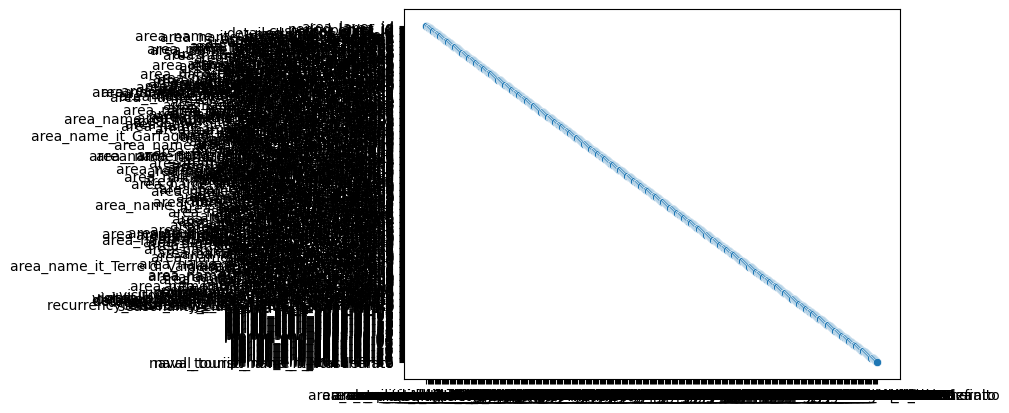

In [132]:
sns.scatterplot(x=[X for X in df_encoded],
                y=[X for X in df_encoded],
                palette="deep",
                legend=None
                )

In [20]:
# Directory containing the CSV files
import os
import pandas as pd

folder_path = '/home/aldof/Documents/Sheet2/data/'

# Get a list of all files in the folder
file_list = os.listdir(folder_path)

# Filter out only the CSV files
csv_files = [file for file in file_list if file.endswith('.csv')]

# Create an empty dictionary to store DataFrames
dfs = {}

# Loop through each CSV file and read it into a DataFrame
for csv_file in csv_files:
    # Construct the full path to the CSV file
    file_path = os.path.join(folder_path, csv_file)
    
    # Read the CSV file into a DataFrame and store it in the dictionary
    df_name = os.path.splitext(csv_file)[0]  # Use the file name as the DataFrame name
    dfs[df_name] = spark.read.format('csv').option('header', 'true').load(file_path)
    #dfs[df_name] = dfs[df_name].dropna(subset="Nbre")

In [22]:
dfs['vfa-regione_toscana.turismo-presence_202205']['area_layer_id']

Column<'area_layer_id'>